In [1]:
import numpy as np

In [3]:
dtrajs = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/PAPER_FIGURES/bayesian_models/apo/100.npy')

In [4]:
dtrajs_glob = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/PAPER_FIGURES/bayesian_models/apo/dtrajs_glob.npy')

In [5]:
dtrajs_glob[0]

'data_cut_start_noH/11707/run59-clone29.h5'

In [6]:
obs_prob = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/hmms/results/25/observation_probabilities.npy')

In [7]:
obs_prob.shape

(24, 100)

In [8]:
# for each macrostate draw 100 samples, with probabilities of each frame given by observation probability of a microstate in that
# macrostate / number of frames in the microstate

In [9]:
numbers_of_frames = np.zeros(100)

for x in dtrajs:
    for y in x:
        numbers_of_frames[y] += 1

In [10]:
np.sum(numbers_of_frames)

9862657.0

In [36]:
numbers_of_frames[0]

22554.0

In [12]:
weights = []

for i in range(24):
    weights_ = []
    for x in dtrajs:
        for y in x:
            weights_.append(obs_prob[i,y] / numbers_of_frames[y])
    weights.append(weights_)

In [13]:
np.sum(np.concatenate(weights))

24.000000000000007

In [15]:
traj_frame_indexes = []

for i,x in enumerate(dtrajs):
    for j in np.arange(len(x)):
        traj_frame_indexes.append((i, j))

In [26]:
draws = []

for i in range(24):
    draws_ = np.random.choice(np.arange(len(traj_frame_indexes)), size=100, replace=False, p=weights[i])
    draws__ = []
    for x in draws_:
        draws__.append(traj_frame_indexes[x])
    draws.append(draws__)    

In [31]:
draws_names = []

for x in draws:
    draws_names_ = []
    for y in x:
        draws_names_.append((dtrajs_glob[y[0]], y[1]))
    draws_names.append(draws_names_)    

In [32]:
len(draws_names)

24

In [35]:
np.save('apo_draws', draws_names)

In [37]:
del weights

In [38]:
del draws

In [2]:
# collected frames on lilac - are in apo_samples

In [4]:
import mdtraj as md

In [15]:
samples = md.load('apo_samples/%d.pdb' % 0)

In [16]:
samples

<mdtraj.Trajectory with 100 frames, 1296 atoms, 162 residues, and unitcells at 0x61cdd4a90>

In [18]:
# SET
selection1 = np.concatenate([np.arange(25,59), np.arange(95,145)])

# SET-I + C-flank
selection2 = np.concatenate([np.arange(59,95), np.arange(145,162)])

In [26]:
rmsds = []

for k in range(24):
    samples = md.load('apo_samples/%d.pdb' % k)
    samples_CA = samples.atom_slice(samples.top.select('name CA'))
    rmsd_matrix_CA = np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            trajectory = samples_CA[i]
            reference = samples_CA[j]                   
            trajectory.superpose(reference, atom_indices=selection1)
            rmsd_matrix_CA[i,j] = np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2)))
    rmsds.append(np.min(np.sum(rmsd_matrix_CA, axis=0) / 99))
    print(k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [30]:
rmsds

[0.58636505226300473,
 0.61522013265075104,
 0.79015566169295715,
 0.81657020311162931,
 0.86586534572052298,
 0.62014334853533615,
 0.72954775964972951,
 0.49245248162987254,
 0.88804667059325615,
 0.84018581413259408,
 0.89499999658025875,
 0.56060434576838902,
 0.85877734292132946,
 0.68166623979505869,
 0.75153367928784298,
 0.56119307725926482,
 0.7193426189570048,
 0.74825616256155147,
 0.7092251506718722,
 0.69461294181588862,
 0.76078174482564076,
 0.73877907943243937,
 0.86366155683392221,
 0.67678715725137728]

In [31]:
np.save('apo_rmsds', rmsds)

In [32]:
np.savetxt('apo_rmsds.csv', rmsds, delimiter=",")

In [33]:
# now we want to compare to the "intrastate RMSD" of the combined top10 of crips membership microstates

In [34]:
meta_sets = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/hmms/results/25/metastable_sets.npy')

In [35]:
meta_sets

array([array([48, 76]), array([47, 97]), array([18, 27]), array([35, 84]),
       array([67]), array([23, 29, 45]), array([65, 72, 83]),
       array([ 5, 17, 32, 40, 70]), array([21, 96]), array([58]),
       array([ 4, 69]), array([ 1, 43]), array([57]),
       array([41, 44, 66, 74, 85, 93]), array([33, 42, 60, 75, 88]),
       array([ 6, 15, 59, 86]),
       array([ 8, 11, 19, 30, 36, 38, 49, 63, 78, 81]),
       array([10, 12, 24, 56, 90]), array([ 0,  9, 39, 71, 77, 91]),
       array([14, 22, 31, 92, 99]), array([20, 28]),
       array([ 3,  7, 13, 16, 25, 37, 62, 68, 73, 82, 95, 98]),
       array([26, 50, 51, 54, 55, 61, 79, 80, 87, 89, 94]),
       array([ 2, 34, 46, 52, 53, 64])], dtype=object)

In [43]:
rmsds = []

for k in range(24):
    meta_set = meta_sets[k]
    samples_ = []
    for micro in meta_set:
        samples_.append(md.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10/pdb/%d.pdb' % micro))
    samples = samples_[0]
    for sample in samples_[1:]:
        samples = md.join([samples, sample])
    samples_CA = samples.atom_slice(samples.top.select('name CA'))
    rmsd_matrix_CA = np.zeros((len(samples),len(samples)))
    for i in range(len(samples)):
        for j in range(len(samples)):
            trajectory = samples_CA[i]
            reference = samples_CA[j]                   
            trajectory.superpose(reference, atom_indices=selection1)
            rmsd_matrix_CA[i,j] = np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2)))
    rmsds.append(np.min(np.sum(rmsd_matrix_CA, axis=0) / (len(rmsd_matrix_CA)-1)))
    print(k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [44]:
rmsds

[0.24865564351019107,
 0.43730347051393276,
 0.80859118700027466,
 0.42056715199656852,
 0.4920765956242879,
 0.24440496540725379,
 0.41692843365258186,
 0.4907491286490902,
 0.58295944998378579,
 0.52530721967558713,
 0.60012079046844169,
 0.28912887790667174,
 0.50905964771906531,
 0.44930931925773621,
 0.64199921914509361,
 0.33741598604145351,
 0.52977045143794532,
 0.72699737852933455,
 0.50193241323642701,
 0.44691555372740999,
 0.76546894998460802,
 0.55289691661586282,
 0.82161288932508858,
 0.66509836533312072]

In [45]:
np.save('apo_rmsds_top10', rmsds)

In [46]:
np.savetxt('apo_rmsds_top10.csv', rmsds, delimiter=",")

In [47]:
# plot rmsds and rmsds_top10 to see correlation

In [78]:
apo_rmsds = np.load('apo_rmsds.npy')

In [79]:
apo_rmsds_top10 = np.load('apo_rmsds_top10.npy')

In [64]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
import seaborn
seaborn.set_style('ticks')

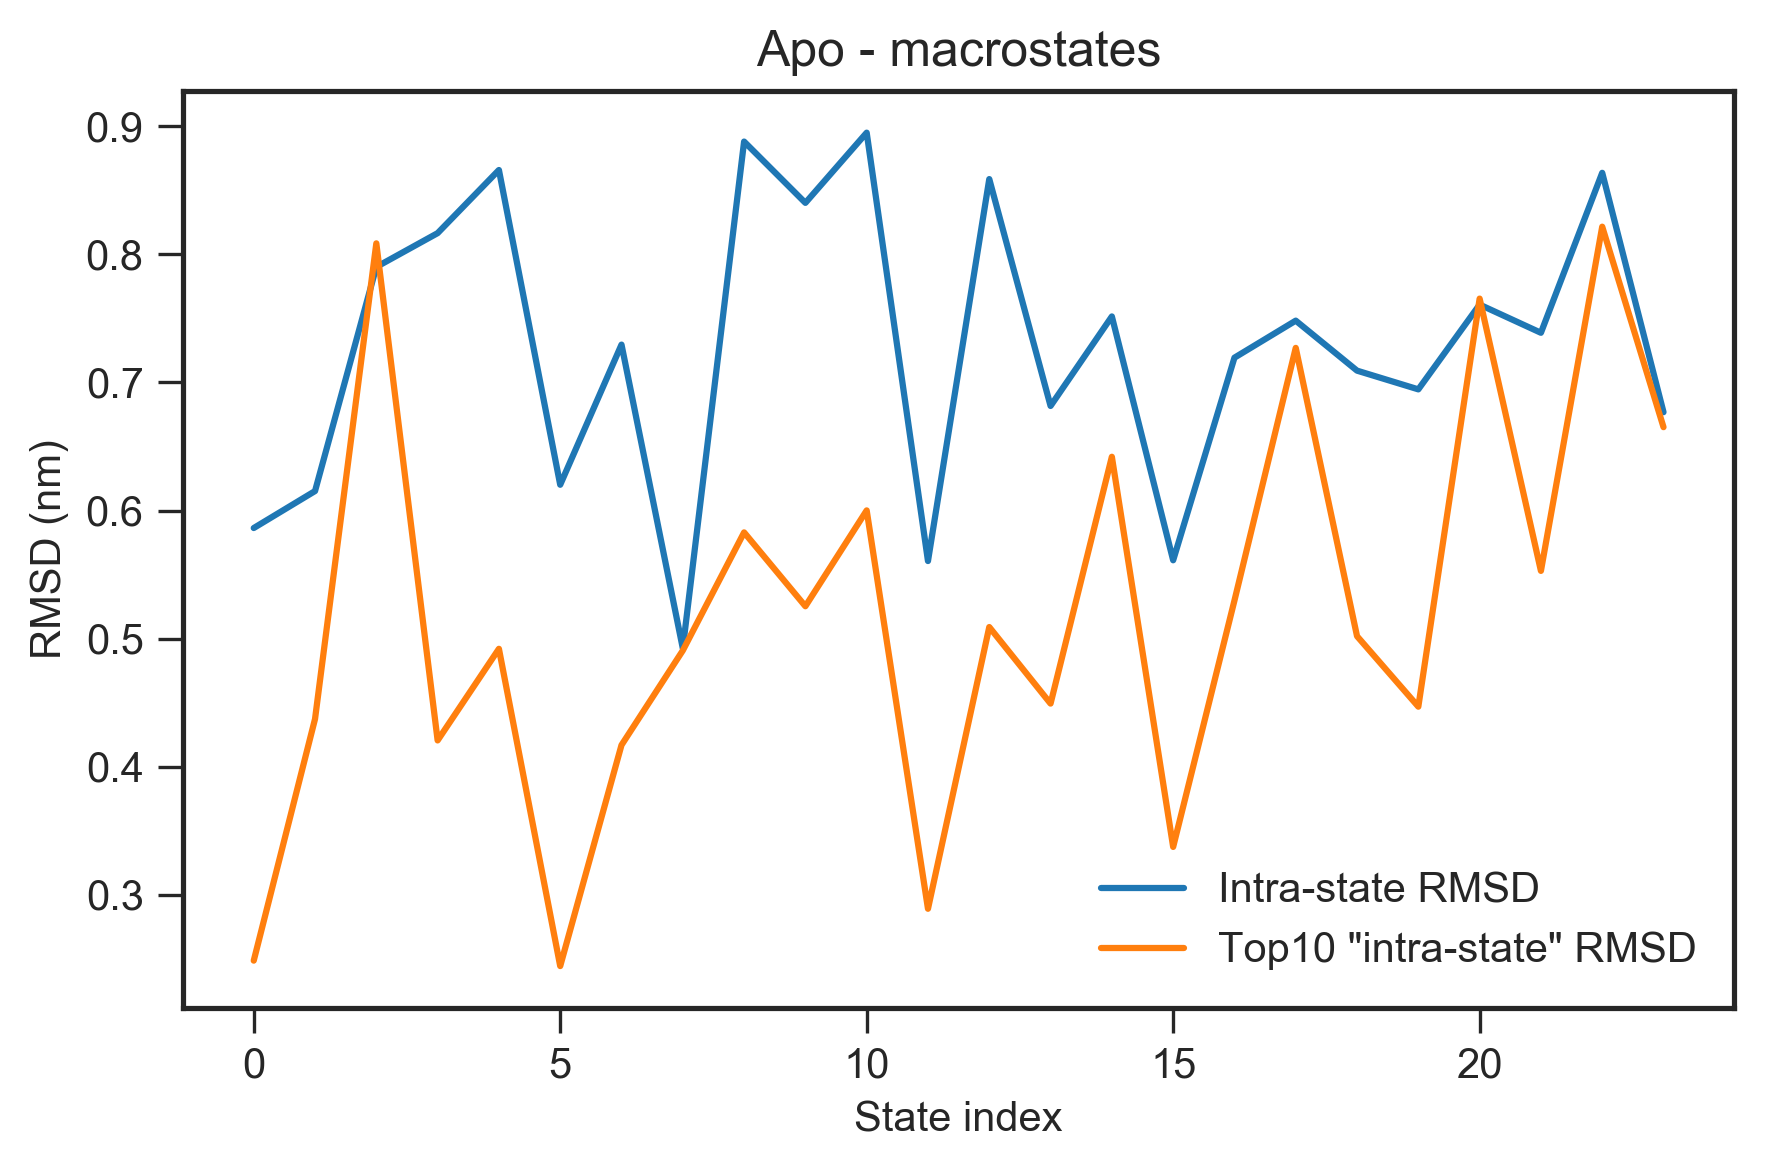

In [88]:
plt.figure(dpi=300)
plt.plot(apo_rmsds, label='Intra-state RMSD')
plt.plot(apo_rmsds_top10, label='Top10 "intra-state" RMSD')
plt.legend()
plt.title('Apo - macrostates')
plt.xlabel('State index')
plt.ylabel('RMSD (nm)')
plt.tight_layout()
plt.savefig('apo_macro.pdf')
plt.show()

In [82]:
sam_rmsds = np.load('sam_rmsds.npy')

In [83]:
sam_rmsds_top10 = np.load('sam_rmsds_top10.npy')

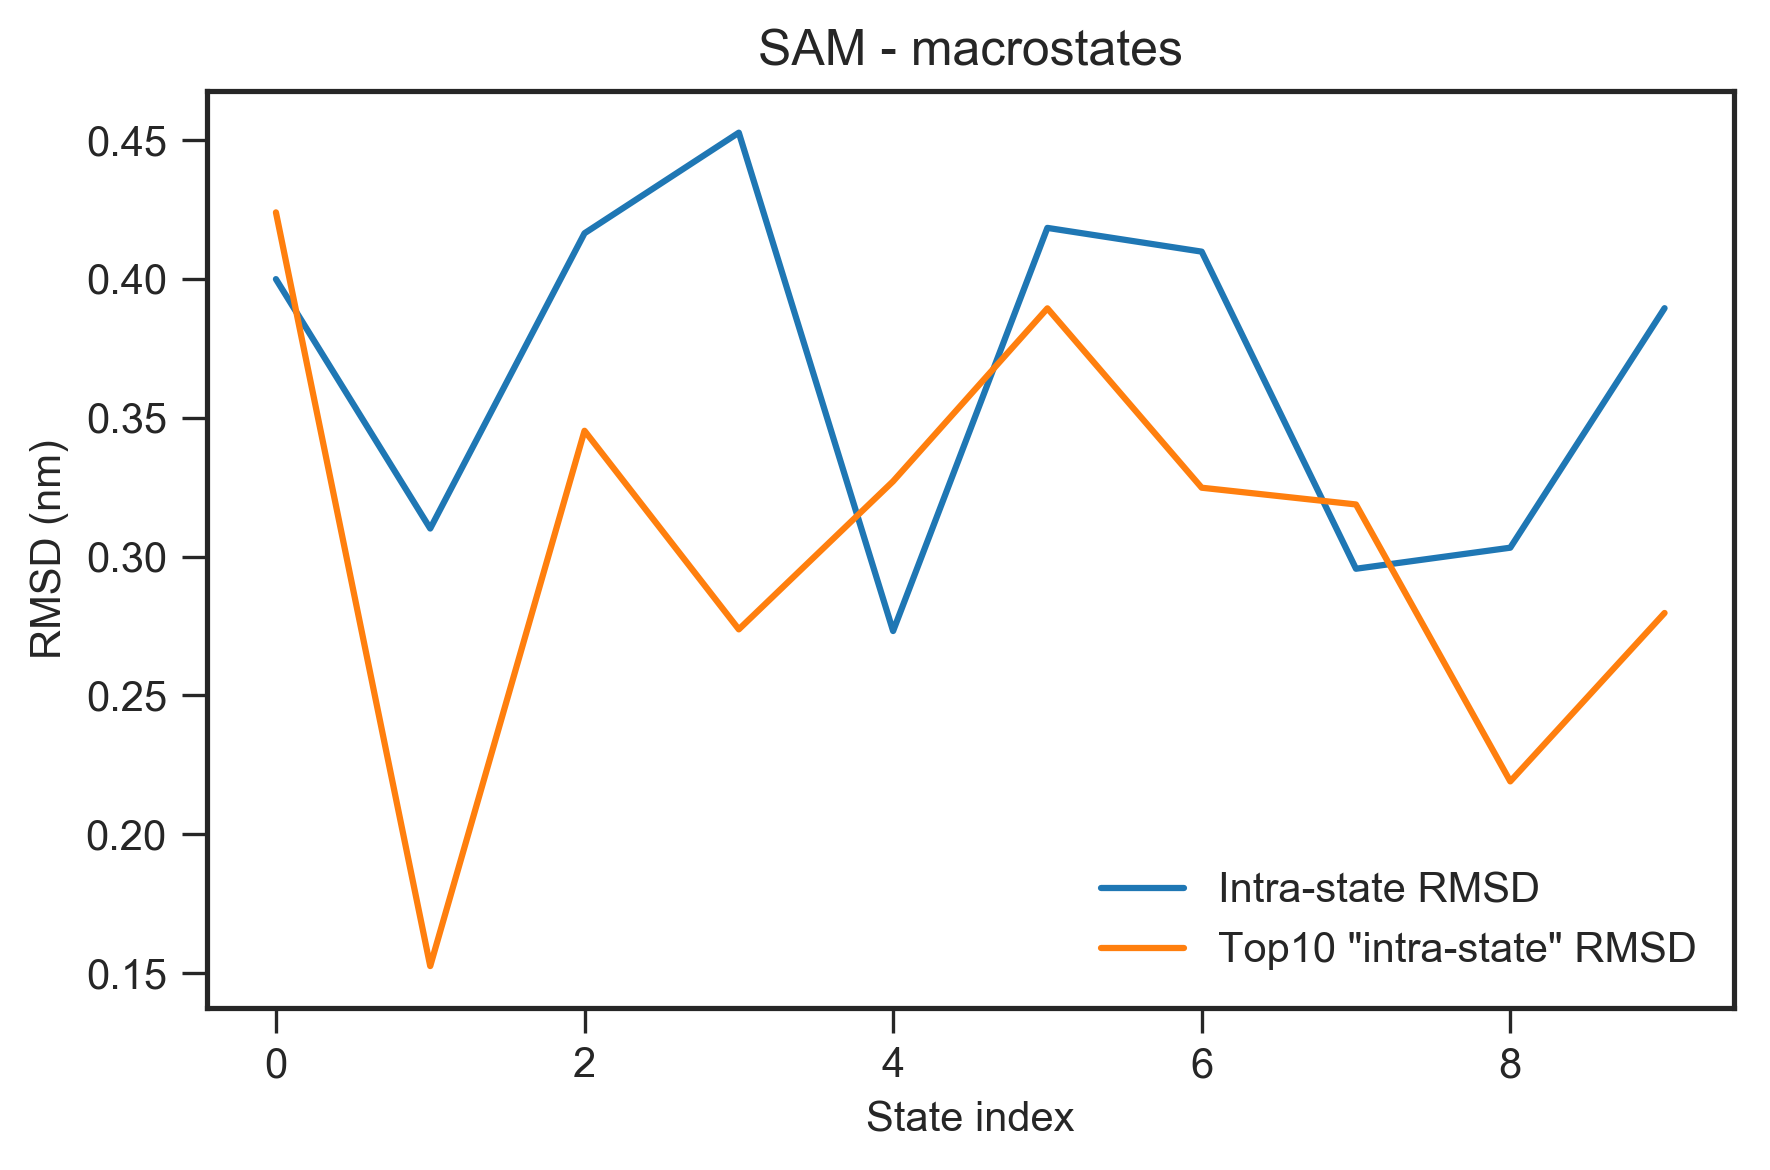

In [89]:
plt.figure(dpi=300)
plt.plot(sam_rmsds, label='Intra-state RMSD')
plt.plot(sam_rmsds_top10, label='Top10 "intra-state" RMSD')
plt.legend()
plt.title('SAM - macrostates')
plt.xlabel('State index')
plt.ylabel('RMSD (nm)')
plt.tight_layout()
plt.savefig('sam_macro.pdf')
plt.show()